In [96]:
#LOADING DATASETS
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.utils import resample

#LOADING DATASETS

credit_card_data = pd.read_csv('data/creditcard.csv')

#Check Data Info

print("\nDataset Info:")
print(credit_card_data.info())
print("\nClass Distribution:")
print(credit_card_data["Class"].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [97]:


print("\nFirst 5 rows:")
print(credit_card_data.head())

print("\n📈 Statistical Summary:")
print(credit_card_data.describe())

print("\n🔎 Null Values Check:")
print(credit_card_data.isnull().sum())


First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

C:\Users\esneh\AppData\Local\Temp\ipykernel_22132\2095759901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=credit_card_data, palette="Set2")


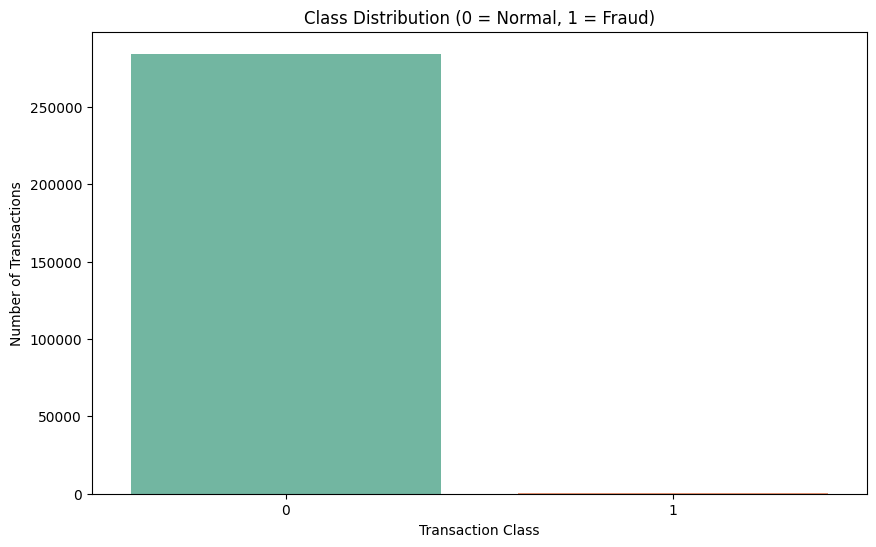


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [98]:
# Class Distribution Visualization
plt.figure(figsize=(10,6))
sns.countplot(x="Class", data=credit_card_data, palette="Set2")
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Number of Transactions")
plt.show()

print("\nClass Distribution:")
print(credit_card_data["Class"].value_counts())

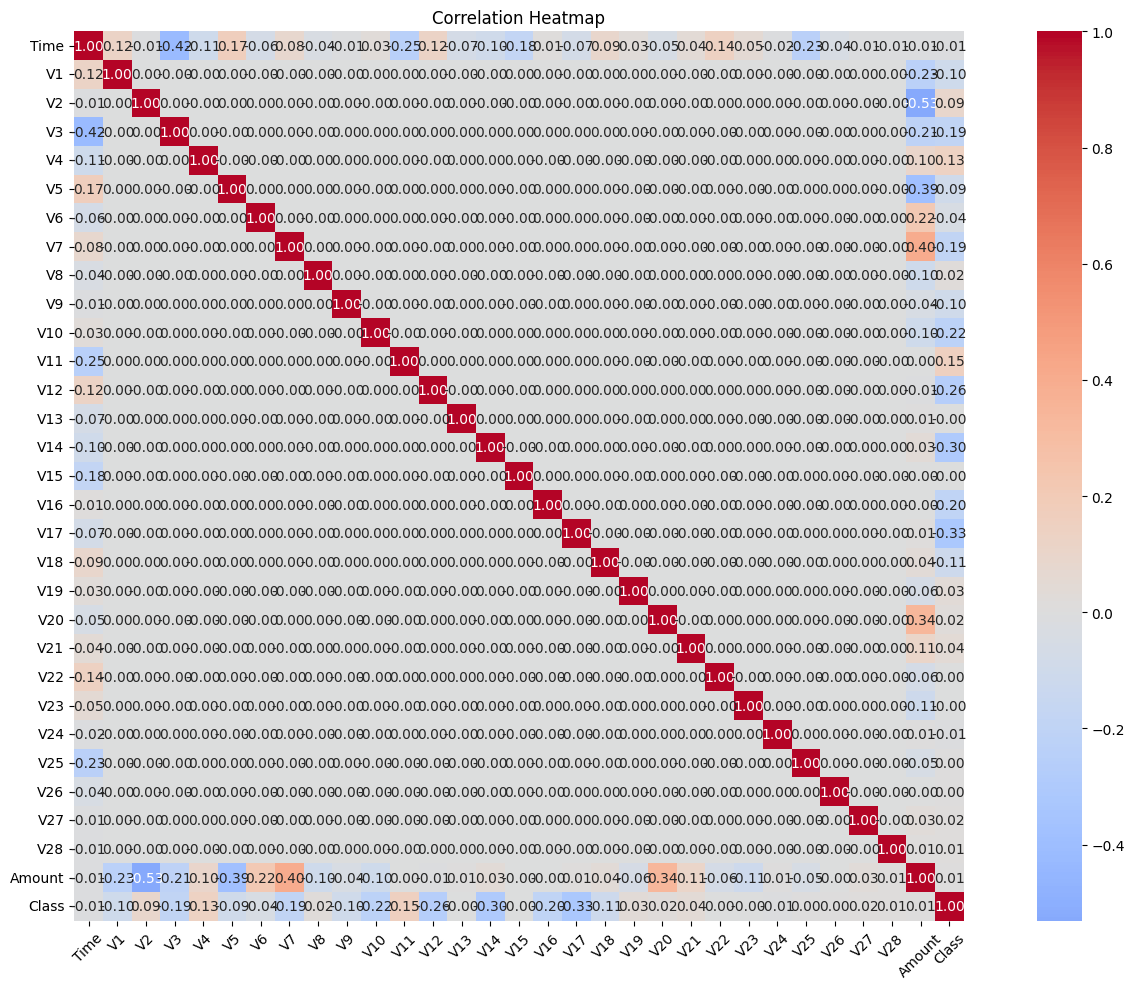

In [99]:
#Correlation Analysis
plt.figure(figsize=(15,10))
sns.heatmap(credit_card_data.corr(), cmap="coolwarm", center=0, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [100]:
# Balance the Dataset using downsampling
# Separate majority and minority classes
fraud = credit_card_data[credit_card_data["Class"] == 1]
normal = credit_card_data[credit_card_data["Class"] == 0]

# Downsample majority class (normal transactions)
normal_downsampled = resample(normal, 
                            replace=False,
                            n_samples=len(fraud)*5,  # 1:5 ratio
                            random_state=42)

# Combine minority class with downsampled majority class
balanced_data = pd.concat([normal_downsampled, fraud])

print("\nBalanced Class Distribution:")
print(balanced_data["Class"].value_counts())
print("\nRatio of Normal to Fraud cases:", len(normal_downsampled)/len(fraud))


Balanced Class Distribution:
Class
0    2460
1     492
Name: count, dtype: int64

Ratio of Normal to Fraud cases: 5.0


In [101]:
#  Feature Scaling
X = balanced_data.drop("Class", axis=1)
y = balanced_data["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [103]:
#Logistic Regression

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("\n📊 Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))


📊 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       493
           1       0.87      0.92      0.90        98

    accuracy                           0.96       591
   macro avg       0.93      0.95      0.94       591
weighted avg       0.97      0.96      0.96       591


Confusion Matrix (Logistic Regression):
[[480  13]
 [  8  90]]


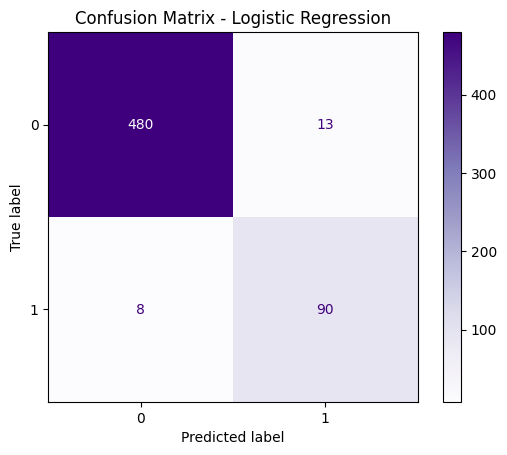

In [104]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="Purples")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


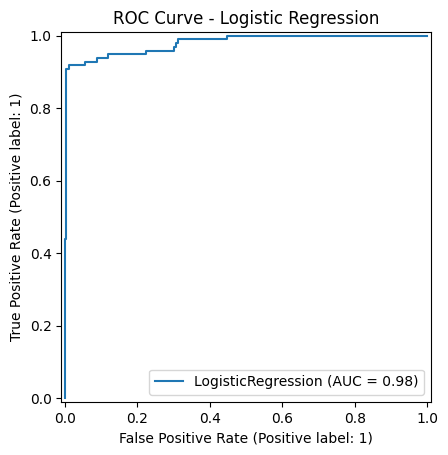

In [105]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [106]:
#RandomForest (Comparison)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n📊 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))




📊 Random Forest Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       0.98      0.90      0.94        98

    accuracy                           0.98       591
   macro avg       0.98      0.95      0.96       591
weighted avg       0.98      0.98      0.98       591


Confusion Matrix (Random Forest):
[[491   2]
 [ 10  88]]


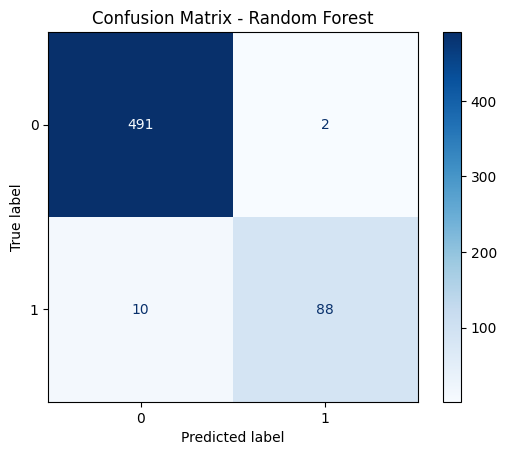

In [107]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

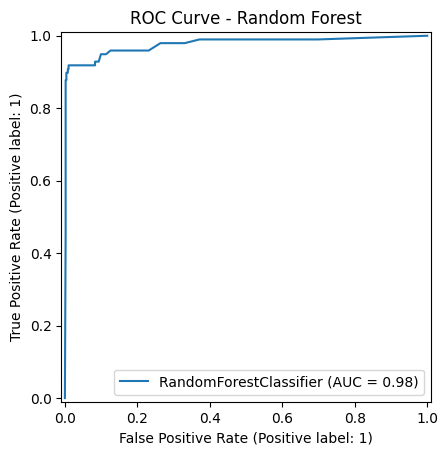

In [108]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

# Project Summary

**This project focuses on Credit Card Fraud Detection using Machine Learning techniques.
The dataset used contains real-world transactions, where the Class variable distinguishes between normal (0) and fraudulent (1) transactions.**

Key Steps:

## Data Loading & Cleaning

* Imported the dataset and checked for missing/null values.
* No missing values were found.

## Exploratory Data Analysis (EDA)

* Generated statistical summaries of all features.
* Visualized class distribution, which showed extreme imbalance (fraud cases are very few compared to normal cases).
* Plotted a correlation heatmap to analyze relationships among variables.

## Data Balancing

* Applied downsampling to balance normal vs fraud transactions, ensuring the model does not get biased towards majority class.

## Feature Scaling

* Standardized the data using StandardScaler to normalize features before model training.

## Model Training & Evaluation

* Implemented Logistic Regression with balanced class weights.
* Evaluated performance using classification report, confusion matrix, and ROC curve.

# Conclusion

**The model evaluation revealed important insights:**

* **The Logistic Regression model achieved high accuracy on the test set.**
* **Precision for fraudulent cases was strong, meaning fewer false positives.**
* **Recall for fraudulent cases showed that most frauds were correctly identified, though a few were still missed.**
* **The ROC curve confirmed good model performance with a high AUC.**
* **Since fraud detection is a highly imbalanced problem, balancing techniques like resampling are crucial.**

**👉 Overall, this project demonstrates that Logistic Regression can effectively detect fraudulent transactions, but in real-world systems, more advanced models like Random Forest, XGBoost, or Neural Networks may further improve fraud detection rates.**